<a href="https://colab.research.google.com/github/nandy004/CODSOFT/blob/main/IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Loading the Data Set

In [12]:
df=pd.read_csv("/content/IRIS (1).csv")

In [13]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [15]:
df.shape

(150, 5)

In [16]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [17]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [20]:
sns.set()

<Axes: xlabel='species', ylabel='count'>

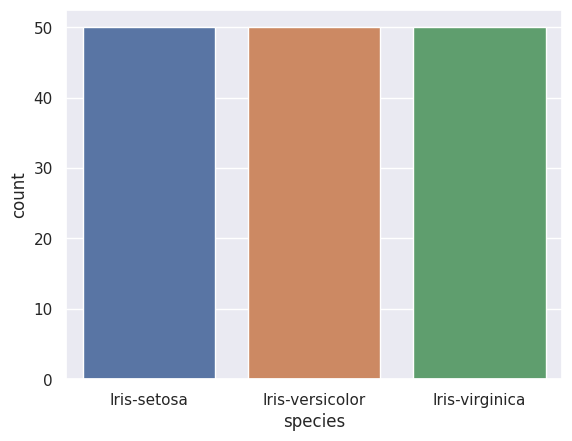

In [21]:
sns.countplot(x='species',data=df)

<Axes: >

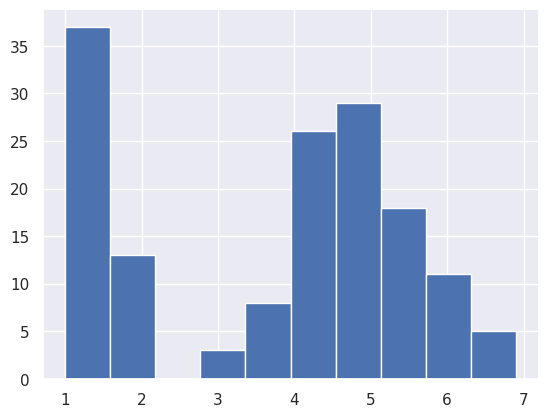

In [23]:
df['petal_length'].hist()

<Axes: >

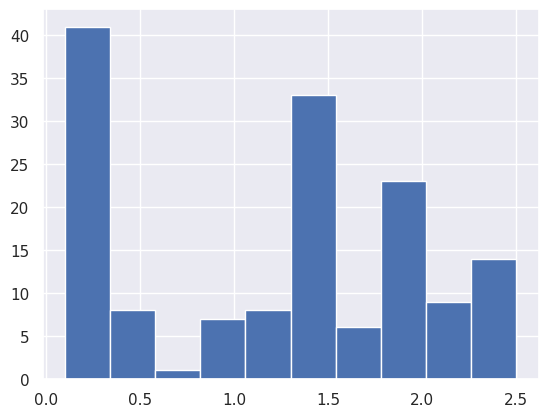

In [24]:
df['petal_width'].hist()

<Axes: >

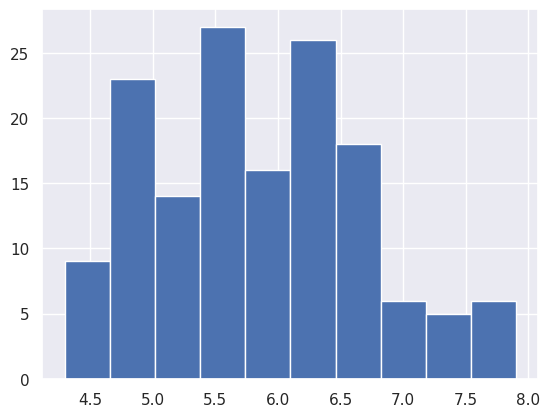

In [25]:

df['sepal_length'].hist()

<Axes: >

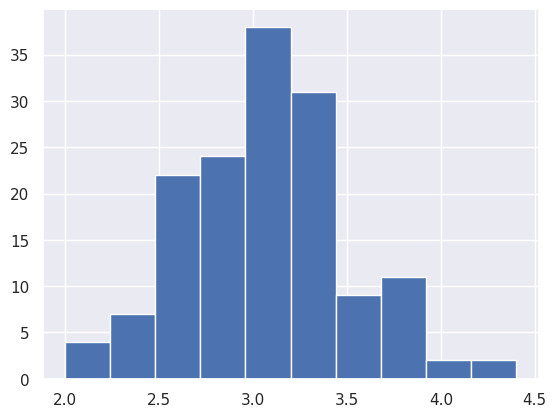

In [26]:

df['sepal_width'].hist()

In [27]:
#scatterplot
colors=['blue','red','green']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']

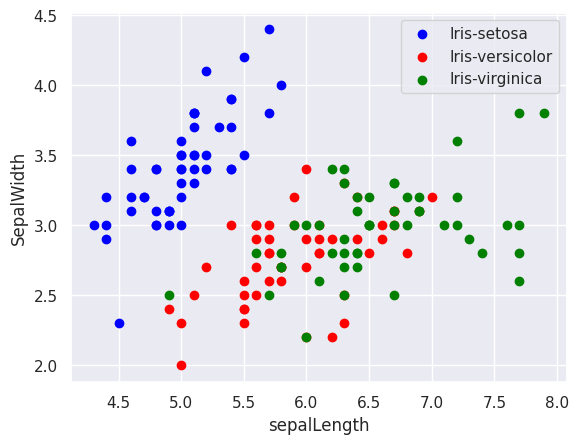

In [28]:
for i in range(3):
   x=df[df['species']==species[i]]
   plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i],label=species[i])
   plt.xlabel('sepalLength')
   plt.ylabel('SepalWidth')
   plt.legend()

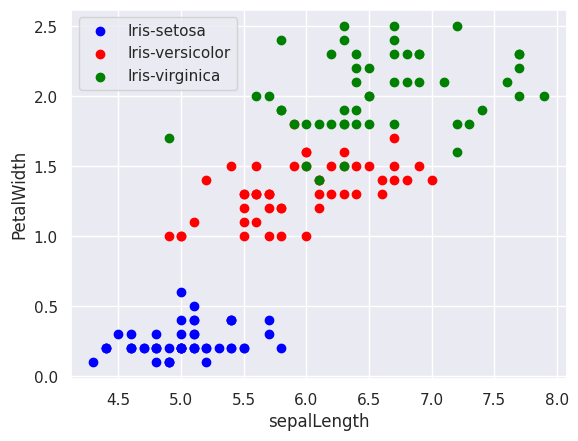

In [29]:
for i in range(3):
   x=df[df['species']==species[i]]
   plt.scatter(x['sepal_length'],x['petal_width'],c=colors[i],label=species[i])
   plt.xlabel('sepalLength')
   plt.ylabel('PetalWidth')
   plt.legend()

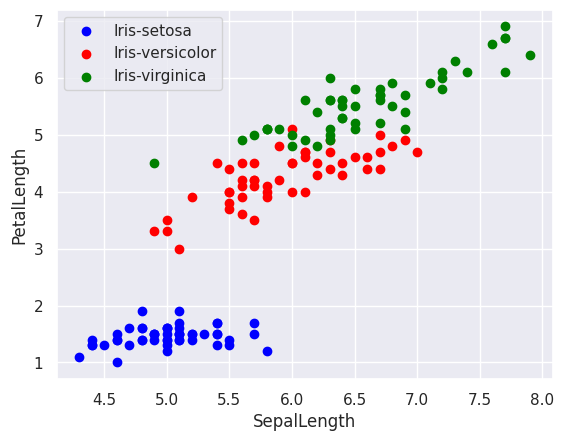

In [30]:
for i in range(3):
   x=df[df['species']==species[i]]
   plt.scatter(x['sepal_length'],x['petal_length'],c=colors[i],label=species[i])
   plt.xlabel('SepalLength')
   plt.ylabel('PetalLength')
   plt.legend()

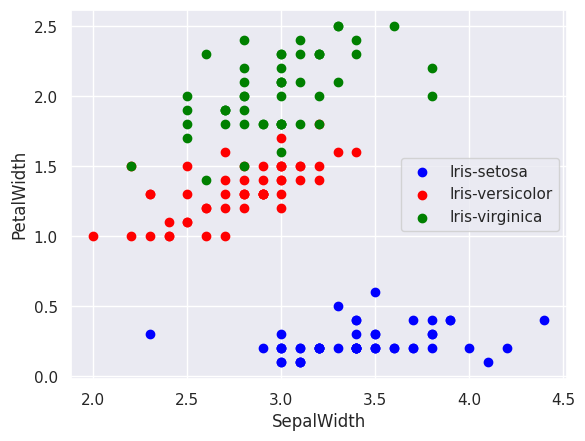

In [31]:
for i in range(3):
   x=df[df['species']==species[i]]
   plt.scatter(x['sepal_width'],x['petal_width'],c=colors[i],label=species[i])
   plt.xlabel('SepalWidth')
   plt.ylabel('PetalWidth')
   plt.legend()


In [32]:
df.corr()

<ipython-input-32-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<ipython-input-33-1a2291dacf2f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

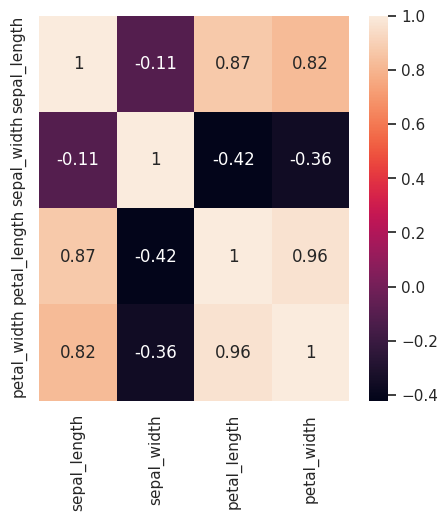

In [33]:
corr=df.corr()
fig,ax=plt.subplots(figsize=(5,5))
sns.heatmap(corr,annot=True,ax=ax)


In [34]:
df.replace({'species' :{'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}},inplace=True)


In [35]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [36]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [37]:
#separating the features and target
x=df.drop(columns=['species'])
y=df['species']
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=2)


In [38]:

print(x.shape, x_train.shape ,x_test.shape)


(150, 4) (120, 4) (30, 4)


In [39]:
model=LogisticRegression()

In [40]:
model.fit(x_train,y_train)

LogisticRegression()

In [41]:
x_train_prediction=model.predict(x_train)

In [42]:
print(x_train_prediction)

[2 0 1 2 1 0 2 1 1 2 1 1 2 1 0 2 0 1 0 0 0 1 2 2 0 2 2 2 2 0 0 2 1 1 2 2 1
 0 1 0 2 1 1 0 1 1 1 2 0 1 0 1 2 0 1 0 0 0 2 2 0 0 2 2 1 2 1 1 2 0 2 2 2 0
 2 0 0 1 2 1 2 1 1 2 1 1 1 2 2 2 2 0 1 1 1 1 2 1 0 0 2 1 2 0 2 0 2 2 0 1 0
 2 1 0 2 1 0 0 1 0]


In [43]:
training_data_accuracy=accuracy_score(y_train,x_train_prediction)
print('Accuracy Score:',training_data_accuracy)

Accuracy Score: 0.975


In [44]:
x_test_prediction=model.predict(x_test)
print(x_test_prediction)

[0 0 2 0 0 2 0 2 2 0 0 0 0 0 1 1 0 1 2 1 2 1 2 1 1 0 0 2 0 2]


In [45]:
test_data_accuracy=accuracy_score(y_test,x_test_prediction)
print('Accuracy Score:',test_data_accuracy)

Accuracy Score: 0.9666666666666667


In [46]:
print("Accuracy:",model.score(x_test,y_test))


Accuracy: 0.9666666666666667
